<a href="https://colab.research.google.com/github/Arindam75/Audio-Resnet/blob/main/Deep_256.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import os
import datetime
import pandas as pd

#import tensorflow as tf
#from tensorflow import keras

#from tensorflow.keras.utils import np_utils
#from tensorflow.keras import backend as K

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Flatten,Dropout,Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras import initializers
import pandas as pd
from tensorflow.keras.regularizers import l2

In [ ]:
path='/content/drive/My Drive/Environmental'
path

'/content/drive/My Drive/Environmental'

In [ ]:
data = np.load(path+'/Training Data1.npz')
X_train=data['name1']
y_train=data['name2']

data = np.load(path+'/Validation Data1.npz')
X_val=data['name1']
y_val=data['name2']

In [ ]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_val=X_val.reshape(X_val.shape[0],X_val.shape[1],X_val.shape[2],1)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(24212, 13, 9, 1)
(24212, 10)
(71, 13, 9, 1)
(71, 10)


In [ ]:
def generator(X,y,batch_size):
  while True:
    samples=X.shape[0]
    batches=samples//batch_size
    
    for batch in range(0,batches):
        start=batch*batch_size
        stop=batch*batch_size+batch_size
        yield X[start:stop],y[start:stop]
    yield X[stop:],y[stop:]

In [ ]:
train_batch_size=32
val_batch_size=32
num_epochs=150

num_train_sequences=X_train.shape[0]
num_val_sequences=X_val.shape[0]

train_generator = generator(X_train, y_train,train_batch_size)
val_generator = generator(X_val, y_val, val_batch_size)

if (num_train_sequences%train_batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/train_batch_size)
else:
    steps_per_epoch = (num_train_sequences//train_batch_size) + 1

if (num_val_sequences%val_batch_size) == 0:
    validation_steps = int(num_val_sequences/val_batch_size)
else:
    validation_steps = (num_val_sequences//val_batch_size) + 1

In [ ]:
my_input=X_train.shape[1:]
model2=Sequential()

model2.add(Conv2D(16,(3,3),activation='relu',strides=(1,1),padding='same',input_shape=my_input,
                  kernel_initializer='glorot_normal'))
model2.add(BatchNormalization())

model2.add(Conv2D(32,(3,3),activation='relu',strides=(1,1),padding='same',kernel_initializer='glorot_normal'))
model2.add(BatchNormalization())

model2.add(Conv2D(64,(3,3),activation='relu',strides=(1,1),padding='same',kernel_initializer='glorot_normal'))
model2.add(BatchNormalization())

model2.add(Conv2D(128,(3,3),activation='relu',strides=(1,1),padding='same',kernel_initializer='glorot_normal'))
model2.add(BatchNormalization())

model2.add(Conv2D(256,(3,3),activation='relu',strides=(1,1),padding='same',kernel_initializer='glorot_normal'))
model2.add(MaxPooling2D((2,2)))

model2.add(Dropout(0.5))
model2.add(Flatten())

model2.add(Dense(128,activation='relu',kernel_initializer='glorot_normal'))
model2.add(Dense(64,activation='relu',kernel_initializer='glorot_normal'))
model2.add(Dense(10,activation='relu',kernel_initializer='glorot_normal'))

model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

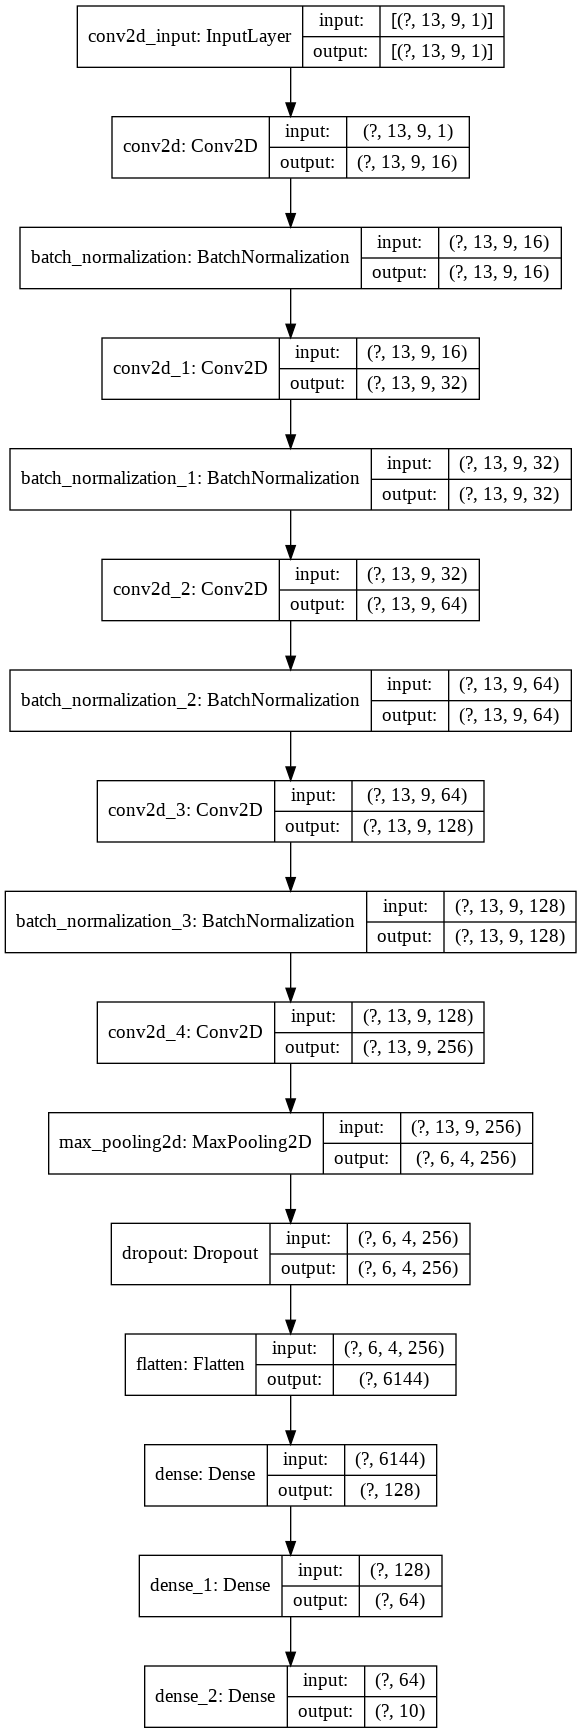

In [ ]:
plot_model(model2, show_shapes=True)

In [ ]:
print(model2.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 13, 9, 16)         160       
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 9, 16)         64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 9, 32)         4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 9, 32)         128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 9, 64)         18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 13, 9, 64)         256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 9, 128)        7

In [ ]:
curr_dt_time = datetime.datetime.now()
model_name =path+'/deep_model_256_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}-{acc:.5f}-{val_acc:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, 
                             save_weights_only=False, mode='auto', period=1)

callbacks_list = [checkpoint]

In [ ]:
history=model2.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list,validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/150
757/757 [==============================] - ETA: 0s - loss: 6.3012 - acc: 0.3500
Epoch 00001: val_acc improved from -inf to 0.30986, saving model to /content/drive/My Drive/Environmental/deep_model_256_init_2020-10-2215_04_22.438362/model-00001-6.30118-7.11761-0.34999-0.30986.h5
757/757 [==============================] - 4s 6ms/step - loss: 6.3012 - acc: 0.3500 - val_loss: 7.1176 - val_acc: 0.3099
Epoch 2/150
753/757 [============================>.] - ETA: 0s - loss: 5.3882 - acc: 0.4137
Epoch 00002: val_acc improved from 0.30986 to 0.38028, saving model to /content/drive/My Drive/Environmental/deep_model_256_init_2020-10-2215_04_22.438362/model-00002-5.38273-5.22067-0.41343-0.38028.h5
757/757 [==============================] - 4s 5ms/step - loss: 5.3827 - acc: 0.4134 - val_loss: 5.2207 - val_acc: 0.3803
Epoch 3/150
749/757 [============================>.] - ETA: 0s - loss: 4.4051 - acc: 0.3815
Epoch

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


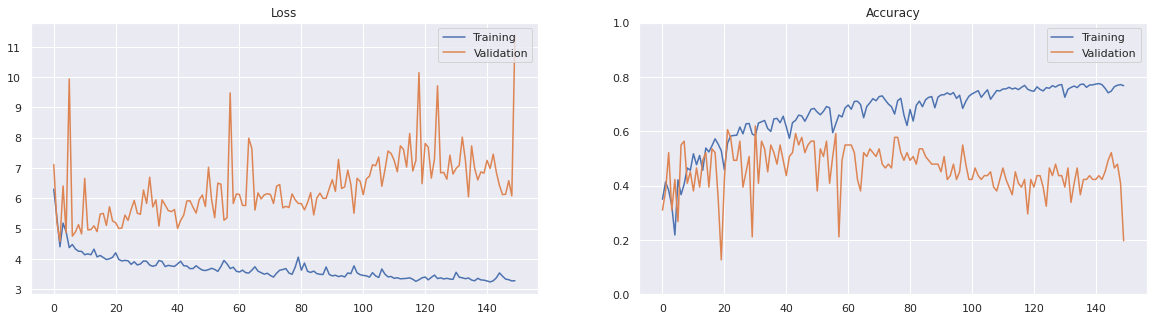

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

fig1, (ax1, ax2) = plt.subplots(1, 2)
fig1.set_figwidth(20)
fig1.set_figheight(5)

#fig1.suptitle('Model 3 Conv 3D Performance No Pre Processing')
ax1.plot(history.history['loss'],label='Training')
ax1.plot(history.history['val_loss'],label='Validation')
ax1.set_title('Loss')
#ax1.set_ylim(0, 3)
ax1.legend(loc="upper right")

ax2.plot(history.history['acc'],label='Training')
ax2.plot(history.history['val_acc'],label='Validation')
ax2.set_title('Accuracy')
ax2.set_ylim(0.0, 1)
ax2.legend(loc="bottom right")

In [ ]:
result_df=pd.DataFrame(list(zip(history.history['acc'],history.history['val_acc'],
history.history['loss'],history.history['val_loss'])),columns =['Acc1', 'Val_Acc1','Loss1','Val_loss1'])

In [ ]:
result_df.to_csv(path+'/deep_model_256_init_2020-10-2215_04_22.438362/result_df.csv')